In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv("./Mall_Customers.csv")

In [4]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
x = dataset.iloc[:,[3,4]].values

# Using elbow method to find optimal number of clusters 

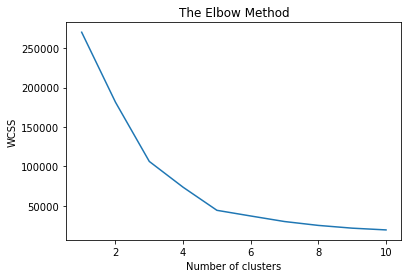

In [6]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)  # attribute inertia_ provides wcss value 

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
# 5 clusters seems optimal 

# Training the K-Means model on the dataset 

In [11]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
#kmeans.fit(x)
y_kmeans = kmeans.fit_predict(x)

In [12]:
# clusters are named as 0, 1, 2, 3, 4
# result is for each row of data 
print(y_kmeans) 

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [ ]:
# first row belongs to cluster 3
# second row belongs to cluster 0
# thrid row belongs to cluster 3



# Visualizing clusters

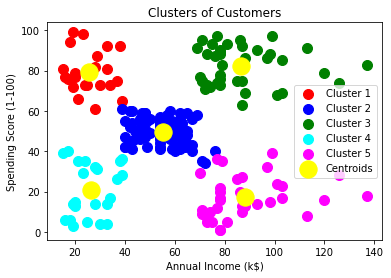

In [26]:
plt.scatter(x[(y_kmeans == 0),0], x[(y_kmeans == 0),1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[(y_kmeans == 1),0], x[(y_kmeans == 1),1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[(y_kmeans == 2),0], x[(y_kmeans == 2),1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[(y_kmeans == 3),0], x[(y_kmeans == 3),1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[(y_kmeans == 4),0], x[(y_kmeans == 4),1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()